Importamos bibliotecas importantes

In [71]:
#Librerias estandar para el preprocesamiento
import pandas as pd
import numpy as np
import sklearn.preprocessing as preprocessing
import sklearn.metrics as metrics

#Para visualizacion de datos.
import matplotlib as mpl
import seaborn as sns
pd.options.display.max_rows = 30
import matplotlib.pyplot as plt
%matplotlib inline

#importamos librerias para la evaluacion
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import  roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

Cargamos el dataset.

In [30]:
data = pd.read_csv('data_smote.csv')
test = pd.read_csv('test.csv')

In [31]:
#Organizamos nuestros datos
X = data.drop("target",axis=1)
y = np.ravel(data["target"])
X_test = test.drop("target",axis=1)
y_test = np.ravel(test["target"])

In [32]:
#Instanciamos y normalizamos nuestros datos con el stdscaler
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

Importamos los modelos.

In [40]:
#Importacion
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm



Instanciamos el pipeline.

In [49]:
#Importamos librerias
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
TfidfTransformer()

In [65]:
#Instanciamos el pipeline que vamos a usar
lista_modelos = [GaussianNB,LogisticRegression,BernoulliNB,MultinomialNB,KNeighborsClassifier,svm.SVC]
a = 0
modelo_elegido = lista_modelos[a]
pipeline = Pipeline([
    #('tfidf', TfidfTransformer()),
    ("model",modelo_elegido()),
])


In [55]:
par_gau = {
    'GaussianNB__sample_weight':[None],
    
}

par_svc = {
    'svc__kernel': ['linear'],
    'svc__C': np.linspace(0.01,0.7,10),
}
lista_parametros = [par_gau,par_svc]
parameters = lista_parametros[a]

## KVecinos

In [69]:
from sklearn.neighbors import KNeighborsClassifier
k_range = np.arange(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores.index(max(scores)), max(scores))

9 0.8223106248964032


             precision    recall  f1-score   support

          0       0.91      0.84      0.87      4575
          1       0.59      0.73      0.65      1458

avg / total       0.83      0.81      0.82      6033



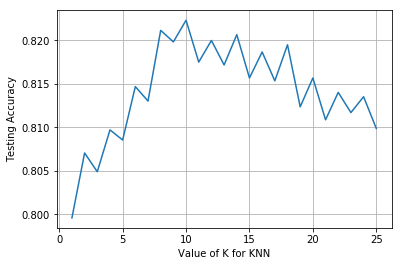

In [73]:
# ploteamos la relacion entre K y la precisión del test
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)


In [74]:
#Fiteamos el mejor modelo
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, y)
y_pred = knn.predict(X_test)

In [75]:
#Imprimimos el reporte de clasificacion con el mejor modelo
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.88      0.89      0.88      4575
          1       0.63      0.62      0.63      1458

avg / total       0.82      0.82      0.82      6033



In [66]:
#fit simple de prueba
pipeline.fit(X,y)

Pipeline(memory=None, steps=[('model', GaussianNB(priors=None))])

In [ ]:
ypipeline.predict(X_test)

Randomsearch con el pipeline.

In [57]:
from sklearn.model_selection import RandomizedSearchCV
rand_search = RandomizedSearchCV(pipeline, parameters, n_jobs = -1 , verbose = 2, n_iter=1)
print("Performing randomized search...") 
rand_search.fit(X, y)


Performing randomized search...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] GaussianNB__sample_weight=None ..................................
[CV] GaussianNB__sample_weight=None ..................................
[CV] GaussianNB__sample_weight=None ..................................


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/opt/conda/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/opt/conda/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x7f46bbb02ae0, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/opt/conda/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x7f46bbb02ae0, file "/...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/opt/conda/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/opt/conda/lib/python3.6/site-packages/tornado/platform/asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    127         except (RuntimeError, AssertionError):
    128             old_loop = None
    129         try:
    130             self._setup_logging()
    131             asyncio.set_event_loop(self.asyncio_loop)
--> 132             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Uni...EventLoop running=True closed=False debug=False>>
    133         finally:
    134             asyncio.set_event_loop(old_loop)
    135 
    136     def stop(self):

...........................................................................
/opt/conda/lib/python3.6/asyncio/base_events.py in run_forever(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_UnixS...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
/opt/conda/lib/python3.6/asyncio/base_events.py in _run_once(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
   1429                         logger.warning('Executing %s took %.3f seconds',
   1430                                        _format_handle(handle), dt)
   1431                 finally:
   1432                     self._current_handle = None
   1433             else:
-> 1434                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(11, 1)>>
   1435         handle = None  # Needed to break cycles when an exception occurs.
   1436 
   1437     def _set_coroutine_wrapper(self, enabled):
   1438         try:

...........................................................................
/opt/conda/lib/python3.6/asyncio/events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(11, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (11, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
/opt/conda/lib/python3.6/site-packages/tornado/platform/asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=11, events=1)
    117             self.writers.remove(fd)
    118         del self.handlers[fd]
    119 
    120     def _handle_events(self, fd, events):
    121         fileobj, handler_func = self.handlers[fd]
--> 122         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    123 
    124     def start(self):
    125         try:
    126             old_loop = asyncio.get_event_loop()

...........................................................................
/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.model_selection import RandomizedSe...ng randomized search...") \nrand_search.fit(X, y)\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 6, 4, 4, 31, 4, 447758, tzinfo=tzlocal()), 'msg_id': 'c6bebdd1ace54237b118e1cd8b7fb49b', 'msg_type': 'execute_request', 'session': 'efe3b484ae3b47688f767078b9541bb9', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'c6bebdd1ace54237b118e1cd8b7fb49b', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'efe3b484ae3b47688f767078b9541bb9']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.model_selection import RandomizedSe...ng randomized search...") \nrand_search.fit(X, y)\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 6, 4, 4, 31, 4, 447758, tzinfo=tzlocal()), 'msg_id': 'c6bebdd1ace54237b118e1cd8b7fb49b', 'msg_type': 'execute_request', 'session': 'efe3b484ae3b47688f767078b9541bb9', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'c6bebdd1ace54237b118e1cd8b7fb49b', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'efe3b484ae3b47688f767078b9541bb9'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.model_selection import RandomizedSe...ng randomized search...") \nrand_search.fit(X, y)\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2019, 6, 4, 4, 31, 4, 447758, tzinfo=tzlocal()), 'msg_id': 'c6bebdd1ace54237b118e1cd8b7fb49b', 'msg_type': 'execute_request', 'session': 'efe3b484ae3b47688f767078b9541bb9', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'c6bebdd1ace54237b118e1cd8b7fb49b', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/opt/conda/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='from sklearn.model_selection import RandomizedSe...ng randomized search...") \nrand_search.fit(X, y)\n', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'from sklearn.model_selection import RandomizedSe...ng randomized search...") \nrand_search.fit(X, y)\n'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/opt/conda/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('from sklearn.model_selection import RandomizedSe...ng randomized search...") \nrand_search.fit(X, y)\n',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('from sklearn.model_selection import RandomizedSe...ng randomized search...") \nrand_search.fit(X, y)\n',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from sklearn.model_selection import RandomizedSe...ng randomized search...") \nrand_search.fit(X, y)\n', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'from sklearn.model_selection import RandomizedSe...ng randomized search...") \nrand_search.fit(X, y)\n'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from sklearn.model_selection import RandomizedSe...ng randomized search...") \nrand_search.fit(X, y)\n', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-57-b5feb255fe79>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 7f4672d60198, executi...rue silent=False shell_futures=True> result=None>)
   2902                     return True
   2903 
   2904             for i, node in enumerate(to_run_interactive):
   2905                 mod = ast.Interactive([node])
   2906                 code = compiler(mod, cell_name, "single")
-> 2907                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x7f46712af8a0, file "<ipython-input-57-b5feb255fe79>", line 4>
        result = <ExecutionResult object at 7f4672d60198, executi...rue silent=False shell_futures=True> result=None>
   2908                     return True
   2909 
   2910             # Flush softspace
   2911             if softspace(sys.stdout, 0):

...........................................................................
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x7f46712af8a0, file "<ipython-input-57-b5feb255fe79>", line 4>, result=<ExecutionResult object at 7f4672d60198, executi...rue silent=False shell_futures=True> result=None>)
   2956         outflag = True  # happens in more places, so it's easier as default
   2957         try:
   2958             try:
   2959                 self.hooks.pre_run_code_hook()
   2960                 #rprint('Running code', repr(code_obj)) # dbg
-> 2961                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x7f46712af8a0, file "<ipython-input-57-b5feb255fe79>", line 4>
        self.user_global_ns = {'BernoulliNB': <class 'sklearn.naive_bayes.BernoulliNB'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'In': ['', 'import pandas as pd\nimport numpy as np', "data = pd.read_csv('adult_smote.csv')\ntest = pd.read_csv('test.csv')", 'data', 'pd.get_dummies(data)', "data = pd.read_csv('data.csv')\ntest = pd.read_csv('test.csv')", 'data', 'data', 'data.drop("Unnamed: 0")', 'data.drop("Unnamed: 0",axis = 1)', 'data.drop("Unnamed: 0",axis = 1)', 'data.drop("Unnamed: 0",axis = 1)', 'data.drop(["Unnamed: 0","fnlwgt","education.num"],axis = 1)', 'data.drop(["Unnamed: 0","fnlwgt","education.num","age"],axis = 1)', 'data.drop(["Unnamed: 0","fnlwgt","education.num","age","native.country"],axis = 1)', 'import pandas as pd\nimport numpy as np', "data = pd.read_csv('data.csv')\ntest = pd.read_csv('test.csv')", 'data.drop(["Unnamed: 0","fnlwgt","education.num","age","native.country"],axis = 1)', 'scaler = preprocessing.StandardScaler()\nX_train = scaler.fit_transform(X_train)', 'import pandas as pd\nimport numpy as np\nimport sklearn.preprocessing as preprocessing', ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'Out': {3:        age  workclass_num  education_num  marita...           1       1  

[40712 rows x 12 columns], 4:        age  workclass_num  education_num  marita...           1       1  

[40712 rows x 12 columns], 6:        Unnamed: 0  age         workclass  fnlwgt...8.0]    Menos 40   1  

[30162 rows x 19 columns], 7:        Unnamed: 0  age         workclass  fnlwgt...8.0]    Menos 40   1  

[30162 rows x 19 columns], 9:        age         workclass  fnlwgt     educati...8.0]    Menos 40   1  

[30162 rows x 18 columns], 10:        age         workclass  fnlwgt     educati...8.0]    Menos 40   1  

[30162 rows x 18 columns], 11:        age         workclass  fnlwgt     educati...8.0]    Menos 40   1  

[30162 rows x 18 columns], 12:        age         workclass     education      ...8.0]    Menos 40   1  

[30162 rows x 16 columns], 13:               workclass     education      marit...8.0]    Menos 40   1  

[30162 rows x 15 columns], 14:               workclass     education      marit...8.0]    Menos 40   1  

[30162 rows x 14 columns], ...}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, 'TfidfTransformer': <class 'sklearn.feature_extraction.text.TfidfTransformer'>, ...}
        self.user_ns = {'BernoulliNB': <class 'sklearn.naive_bayes.BernoulliNB'>, 'GaussianNB': <class 'sklearn.naive_bayes.GaussianNB'>, 'In': ['', 'import pandas as pd\nimport numpy as np', "data = pd.read_csv('adult_smote.csv')\ntest = pd.read_csv('test.csv')", 'data', 'pd.get_dummies(data)', "data = pd.read_csv('data.csv')\ntest = pd.read_csv('test.csv')", 'data', 'data', 'data.drop("Unnamed: 0")', 'data.drop("Unnamed: 0",axis = 1)', 'data.drop("Unnamed: 0",axis = 1)', 'data.drop("Unnamed: 0",axis = 1)', 'data.drop(["Unnamed: 0","fnlwgt","education.num"],axis = 1)', 'data.drop(["Unnamed: 0","fnlwgt","education.num","age"],axis = 1)', 'data.drop(["Unnamed: 0","fnlwgt","education.num","age","native.country"],axis = 1)', 'import pandas as pd\nimport numpy as np', "data = pd.read_csv('data.csv')\ntest = pd.read_csv('test.csv')", 'data.drop(["Unnamed: 0","fnlwgt","education.num","age","native.country"],axis = 1)', 'scaler = preprocessing.StandardScaler()\nX_train = scaler.fit_transform(X_train)', 'import pandas as pd\nimport numpy as np\nimport sklearn.preprocessing as preprocessing', ...], 'KNeighborsClassifier': <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'MultinomialNB': <class 'sklearn.naive_bayes.MultinomialNB'>, 'Out': {3:        age  workclass_num  education_num  marita...           1       1  

[40712 rows x 12 columns], 4:        age  workclass_num  education_num  marita...           1       1  

[40712 rows x 12 columns], 6:        Unnamed: 0  age         workclass  fnlwgt...8.0]    Menos 40   1  

[30162 rows x 19 columns], 7:        Unnamed: 0  age         workclass  fnlwgt...8.0]    Menos 40   1  

[30162 rows x 19 columns], 9:        age         workclass  fnlwgt     educati...8.0]    Menos 40   1  

[30162 rows x 18 columns], 10:        age         workclass  fnlwgt     educati...8.0]    Menos 40   1  

[30162 rows x 18 columns], 11:        age         workclass  fnlwgt     educati...8.0]    Menos 40   1  

[30162 rows x 18 columns], 12:        age         workclass     education      ...8.0]    Menos 40   1  

[30162 rows x 16 columns], 13:               workclass     education      marit...8.0]    Menos 40   1  

[30162 rows x 15 columns], 14:               workclass     education      marit...8.0]    Menos 40   1  

[30162 rows x 14 columns], ...}, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'RandomizedSearchCV': <class 'sklearn.model_selection._search.RandomizedSearchCV'>, 'TfidfTransformer': <class 'sklearn.feature_extraction.text.TfidfTransformer'>, ...}
   2962             finally:
   2963                 # Reset our crash handler in place
   2964                 sys.excepthook = old_excepthook
   2965         except SystemExit as e:

...........................................................................
/home/DS-DH/entrega_2/<ipython-input-57-b5feb255fe79> in <module>()
      1 from sklearn.model_selection import RandomizedSearchCV
      2 rand_search = RandomizedSearchCV(pipeline, parameters, n_jobs = -1 , verbose = 2, n_iter=1)
      3 print("Performing randomized search...") 
----> 4 rand_search.fit(X, y)

...........................................................................
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py in fit(self=RandomizedSearchCV(cv=None, error_score='raise',...turn_train_score='warn', scoring=None, verbose=2), X=array([[ 0.66980639, -1.41020278, -2.98506798, .... -0.87287688,
        -0.73552633, -0.44345325]]), y=array([0, 0, 0, ..., 1, 1, 1]), groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X = array([[ 0.66980639, -1.41020278, -2.98506798, .... -0.87287688,
        -0.73552633, -0.44345325]])
        y = array([0, 0, 0, ..., 1, 1, 1])
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Tue Jun  4 04:31:04 2019
PID: 210                                Python 3.6.6: /opt/conda/bin/python
...........................................................................
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(memory=None,
     steps=[('tfidf', Tfid..._idf=True)), ('model', GaussianNB(priors=None))]), memmap([[ 0.66980639, -1.41020278, -2.98506798, ...-0.87287688,
         -0.73552633, -0.44345325]]), array([0, 0, 0, ..., 1, 1, 1]), {'score': <function _passthrough_scorer>}, array([ 8002,  8006,  8008, ..., 36155, 36156, 36157]), array([    0,     1,     2, ..., 24011, 24015, 24019]), 2, {'GaussianNB__sample_weight': None}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(memory=None,
     steps=[('tfidf', Tfid..._idf=True)), ('model', GaussianNB(priors=None))]), memmap([[ 0.66980639, -1.41020278, -2.98506798, ...-0.87287688,
         -0.73552633, -0.44345325]]), array([0, 0, 0, ..., 1, 1, 1]), {'score': <function _passthrough_scorer>}, array([ 8002,  8006,  8008, ..., 36155, 36156, 36157]), array([    0,     1,     2, ..., 24011, 24015, 24019]), 2, {'GaussianNB__sample_weight': None})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=Pipeline(memory=None,
     steps=[('tfidf', Tfid..._idf=True)), ('model', GaussianNB(priors=None))]), X=memmap([[ 0.66980639, -1.41020278, -2.98506798, ...-0.87287688,
         -0.73552633, -0.44345325]]), y=array([0, 0, 0, ..., 1, 1, 1]), scorer={'score': <function _passthrough_scorer>}, train=array([ 8002,  8006,  8008, ..., 36155, 36156, 36157]), test=array([    0,     1,     2, ..., 24011, 24015, 24019]), verbose=2, parameters={'GaussianNB__sample_weight': None}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    439                       for k, v in fit_params.items()])
    440 
    441     test_scores = {}
    442     train_scores = {}
    443     if parameters is not None:
--> 444         estimator.set_params(**parameters)
        estimator.set_params = <bound method Pipeline.set_params of Pipeline(me...idf=True)), ('model', GaussianNB(priors=None))])>
        parameters = {'GaussianNB__sample_weight': None}
    445 
    446     start_time = time.time()
    447 
    448     X_train, y_train = _safe_split(estimator, X, y, train)

...........................................................................
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py in set_params(self=Pipeline(memory=None,
     steps=[('tfidf', Tfid..._idf=True)), ('model', GaussianNB(priors=None))]), **kwargs={'GaussianNB__sample_weight': None})
    137 
    138         Returns
    139         -------
    140         self
    141         """
--> 142         self._set_params('steps', **kwargs)
        self._set_params = <bound method _BaseComposition._set_params of Pi...idf=True)), ('model', GaussianNB(priors=None))])>
        kwargs = {'GaussianNB__sample_weight': None}
    143         return self
    144 
    145     def _validate_steps(self):
    146         names, estimators = zip(*self.steps)

...........................................................................
/opt/conda/lib/python3.6/site-packages/sklearn/utils/metaestimators.py in _set_params(self=Pipeline(memory=None,
     steps=[('tfidf', Tfid..._idf=True)), ('model', GaussianNB(priors=None))]), attr='steps', **params={'GaussianNB__sample_weight': None})
     44         names, _ = zip(*getattr(self, attr))
     45         for name in list(six.iterkeys(params)):
     46             if '__' not in name and name in names:
     47                 self._replace_estimator(attr, name, params.pop(name))
     48         # 3. Step parameters and other initilisation arguments
---> 49         super(_BaseComposition, self).set_params(**params)
        self.set_params = <bound method Pipeline.set_params of Pipeline(me...idf=True)), ('model', GaussianNB(priors=None))])>
        params = {'GaussianNB__sample_weight': None}
     50         return self
     51 
     52     def _replace_estimator(self, attr, name, new_val):
     53         # assumes `name` is a valid estimator name

...........................................................................
/opt/conda/lib/python3.6/site-packages/sklearn/base.py in set_params(self=Pipeline(memory=None,
     steps=[('tfidf', Tfid..._idf=True)), ('model', GaussianNB(priors=None))]), **params={'GaussianNB__sample_weight': None})
    269             key, delim, sub_key = key.partition('__')
    270             if key not in valid_params:
    271                 raise ValueError('Invalid parameter %s for estimator %s. '
    272                                  'Check the list of available parameters '
    273                                  'with `estimator.get_params().keys()`.' %
--> 274                                  (key, self))
        key = 'GaussianNB'
        self = Pipeline(memory=None,
     steps=[('tfidf', Tfid..._idf=True)), ('model', GaussianNB(priors=None))])
    275 
    276             if delim:
    277                 nested_params[key][sub_key] = value
    278             else:

ValueError: Invalid parameter GaussianNB for estimator Pipeline(memory=None,
     steps=[('tfidf', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)), ('model', GaussianNB(priors=None))]). Check the list of available parameters with `estimator.get_params().keys()`.
___________________________________________________________________________

Mostramos el mejor score y el mejor set de parametros.

In [40]:
print("Best score: %0.3f" % rand_search . best_score_) #Prueba 1: Score: 0.749 svc__C:0.47 svc_kernel:'linear'
print("Best parameters set:" )
best_parameters_rand = rand_search.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters_rand[param_name])) 

Best score: 0.749
Best parameters set:
	 svc__C: 0.47
	 svc__kernel: 'linear'


Nos llevamos el mejor modelo.

In [41]:
model = rand_search.best_estimator_
pred = model.predict(X_test)

In [42]:

print('CV scores: {}'.format(scores))

print('Average CVScore: {:0.3f} +/- {:0.3f}'.format(scores.mean(), scores.std()))


print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       0.92      0.67      0.77      2298
          1       0.43      0.81      0.56       719

avg / total       0.80      0.70      0.72      3017



Gridsearch

Imprimimos el score

In [ ]:
print("Best score: %0.3f" % grid_search . best_score_) 
print("Best parameters set:" )
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted (parameters . keys()): 
                    print("\t %s: %r" % (param_name, best_parameters[param_name])) 

from sklearn.metrics import classification_report
print(classification_report(y_new, pred))